# Hough Circle Feature Creator:
Finding circles is a significant component of the assembly process, as it can be used to refine part location. Hough Circle filter is a part of the OpenCV package.  Although this function works well in most cases, it requires some tuning of parameters for each context in which it is used.  We have found this to be tedious, so we provide a feature creator that will automatically tune the filter to the context in which it is used.  

## Usage  
1. In order to find circle features, the image plane of the camera must be parallel to the plane of the circle.
1. For the tuning process, the center of the circle must be in the center of the color camera's view
1. Make a note of the height of the TCP above the circle you are looking for. 
1. When you look for a circle using the feature created here, you need to begin the search at the same height it was tuned
1. Make sure to measure the diameter of the circle before you start this notebook


# Init

In [1]:
import rmlib
rm = rmlib.RMLib()

Setting up robot please wait...
Robot Ready!


# Alignment Tool
This simple interface is provided to streamline centering by saving you trips between the robot and this notebook.  Not required.

In [2]:
from ipywidgets import Button, HBox, VBox
import ipywidgets as widgets

# Set up a simple GUI to translate the gripper
out = widgets.Output()
words = ['Forward', 'Back', 'Left', 'Right', 'Raise', 'Lower']
items = [Button(description=w) for w in words]
left_box = VBox([items[0], items[2], items[4], out])
right_box = VBox([items[1], items[3], items[5]])

print("You can use these buttons to position the gripper color camera DIRECTLY over the center of the circle.")
display(HBox([left_box, right_box]))

move_dist = 0.005


def forward_clicked(_):
      # "linking function with output"
    with out:
        # what happens when we press the button
        rm.movel([0, -move_dist, 0, 0, 0, 0], frame='tool')


def back_clicked(_):
      # "linking function with output"
    with out:
        # what happens when we press the button
        rm.movel([0, move_dist, 0, 0, 0, 0], frame='tool')


def left_clicked(_):
      # "linking function with output"
    with out:
        # what happens when we press the button
        rm.movel([-move_dist, 0, 0, 0, 0, 0], frame='tool')


def right_clicked(_):
      # "linking function with output"
    with out:
        # what happens when we press the button
        rm.movel([move_dist, 0, 0, 0, 0, 0], frame='tool')


def raise_clicked(_):
      # "linking function with output"
    with out:
        # what happens when we press the button
        rm.movel([0, 0, -move_dist, 0, 0, 0], frame='tool')


def lower_clicked(_):
      # "linking function with output"
    with out:
        # what happens when we press the button
        rm.movel([0, 0, move_dist, 0, 0, 0], frame='tool')


items[0].on_click(forward_clicked)
items[1].on_click(back_clicked)
items[2].on_click(left_clicked)
items[3].on_click(right_clicked)
items[4].on_click(raise_clicked)
items[5].on_click(lower_clicked)


You can use these buttons to position the gripper color camera DIRECTLY over the center of the circle.


# Setup

### 1. Close Gripper()

In [3]:
rm.close_gripper()

False

### 2. Place the tip of the gripper on the top center of the circle to tune.

### 3. Align camera plane parallel to the plane of the circle

In [5]:
rm.align_gripper_with_axis()

True

### 4. Set the view distance in meters, 0.070 [m] works well for small circles  

In [6]:
view_distance = 0.070  # meters

# Compute a view pose
viewPose = rm.back_up_for_view(rm.get_tcp_pose(), view_distance)


### 5. Move to the computed view Pose (May need to be adjusted)

In [7]:
rm.movej( viewPose )
rm.open_gripper()

True

### 6. Set the diameter of the circle to search for, in meters

Check that the circle with diameter 0.075 closely overlaps the circle in the camera image below


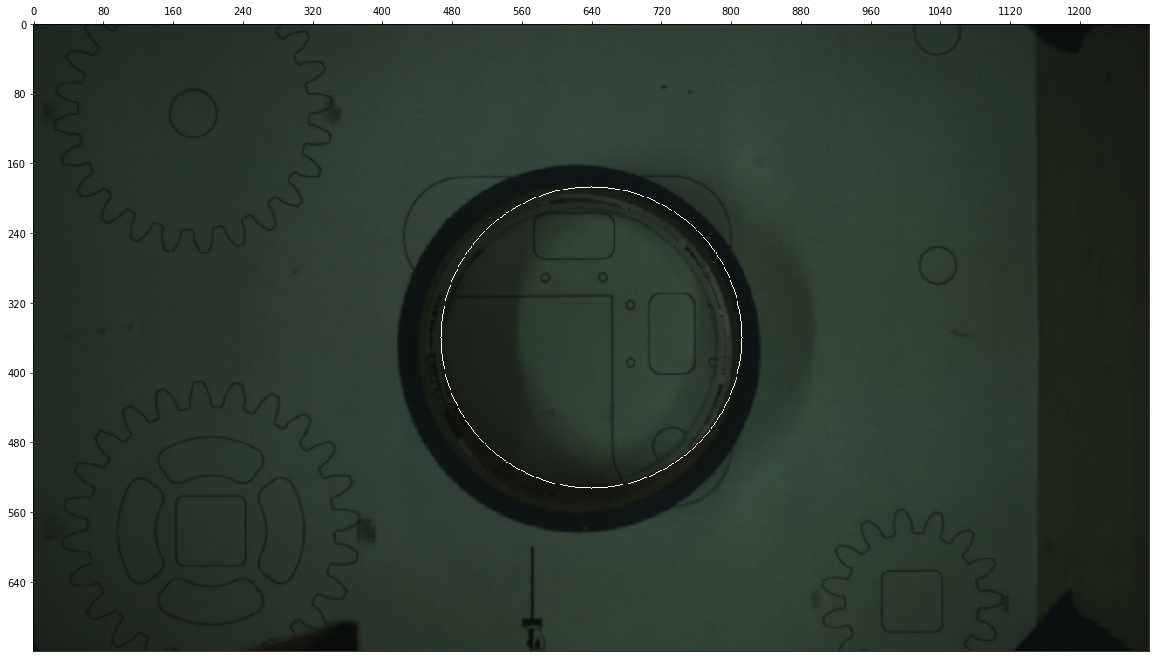

In [9]:
diameter = 0.075  # meters

radius = int(rm.spc_to_pxls(diameter/2, view_distance))

print("Check that the circle with diameter", diameter,
      "closely overlaps the circle in the camera image below")
image = rm.get_color_image()
view = rm.CI_Viewer()
view.add_image(image)
view.add_circle([640, 360], radius=radius, thickness=1)
view.show()


# Create Feature

In [10]:
holeFeature = rm.create_hough_feature(view_distance, diameter)


radius: 173 minRadius: 160 , maxRadius: 185
i: 0 , j: 0
Caching 50 images...
Captured 50 images!
cost: [0.]  b: 2  p1: 18  p2: 22
0.0
Particle 0 has zero sample cost but 0 population cost Zero Particle , Shortcutting with cost 0 less than 0.0005
The best parameters are [ 2 18 22]


# Check tuned params
* This will test the hole-finding feature that you just created.
* You may want to move the circle out of center of the camera view to prove to yourself that it works.

{'view_distance': 0.07, 'capture_process_list': [{'min_rad_px': 160, 'descriptor': 'center_circle', 'param_1': 18, 'param_2': 22, 'max_rad_px': 185, 'blur': 5, 'search_radius_px': 500, 'min_dist_px': 346.0}]}


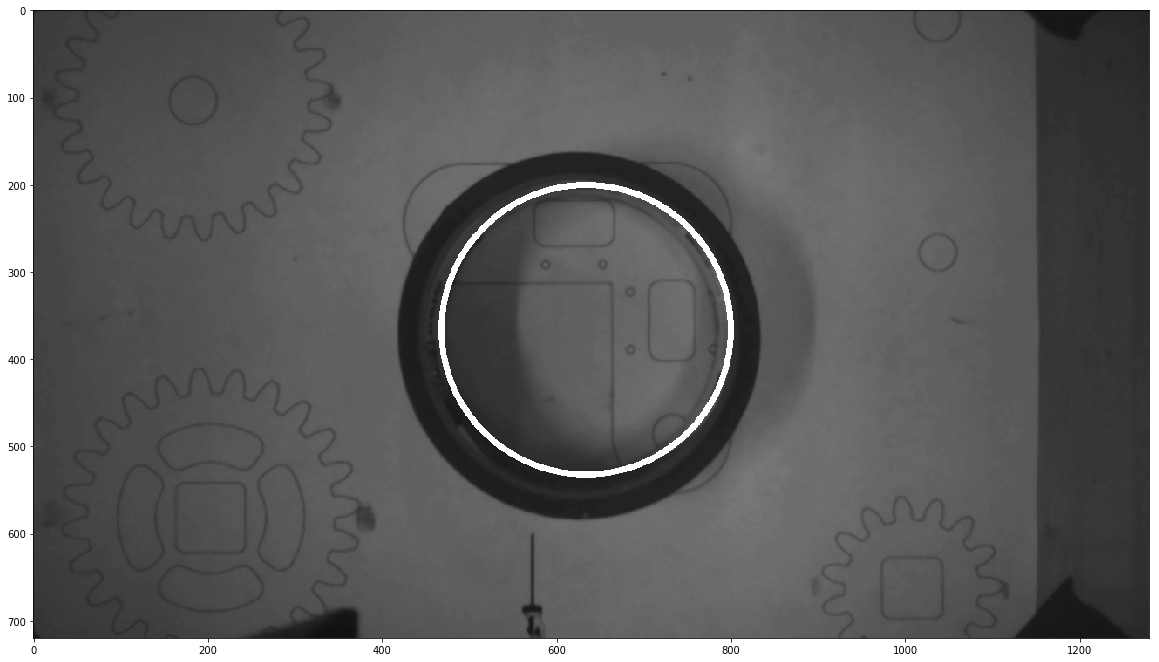

In [11]:
print(holeFeature)
rm.hough_circles_feature(holeFeature, output=1)


# Utility Functions
You may need these functions as you go through the tuning process.

In [16]:
rm.close_gripper()

False

In [17]:
rm.open_gripper()

True

In [18]:
rm.get_tcp_pose()

array([[-9.99998438e-01,  1.76766351e-03,  1.24681879e-05,
        -7.11276019e-02],
       [ 1.76767926e-03,  9.99997453e-01,  1.40313687e-03,
        -3.27315518e-01],
       [-9.98788231e-06,  1.40315672e-03, -9.99999016e-01,
         1.10160529e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [19]:
rm.align_gripper_with_axis()

True

# Gear Params
These were previously recorded at RM using a scaled-down version of the Siemens Gear Train Problem

In [ ]:
gear1hough = {'capture_process_list': [{'descriptor': 'center_circle', 'param_2': 14, 'min_dist_px': 62.0, 'param_1': 20, 'search_radius_px': 500, 'blur': 5, 'max_rad_px': 34, 'min_rad_px': 28}], 'view_distance': 0.067}
gear2hough = {'capture_process_list': [{'min_dist_px': 90.0, 'max_rad_px': 48, 'descriptor': 'center_circle', 'blur': 3, 'param_2': 18, 'param_1': 17, 'search_radius_px': 500, 'min_rad_px': 41}], 'view_distance': 0.21}
post1hough = {'capture_process_list': [{'param_1': 10, 'descriptor': 'center_circle', 'blur': 9, 'max_rad_px': 57, 'min_rad_px': 50, 'search_radius_px': 200, 'param_2': 12, 'min_dist_px': 108.0}], 'view_distance': 0.105}
hole2hough = {'view_distance': 0.067, 'capture_process_list': [{'min_rad_px': 63, 'max_rad_px': 72, 'param_1': 10, 'descriptor': 'center_circle', 'param_2': 23, 'min_dist_px': 136.0, 'search_radius_px': 200, 'blur': 11}]}
hole3hough = {'view_distance': 0.067, 'capture_process_list': [{'blur': 7, 'descriptor': 'center_circle', 'search_radius_px': 200, 'min_rad_px': 56, 'min_dist_px': 122.0, 'param_2': 12, 'param_1': 36, 'max_rad_px': 65}]}

In [4]:
holeFeature = {'view_distance': 0.07, 'capture_process_list': [{'min_dist_px': 28.0, 'param_2': 19, 'max_rad_px': 19, 'search_radius_px': 500, 'descriptor': 'center_circle', 'min_rad_px': 9, 'param_1': 10, 'blur': 11}]}